# **🧪 Assignment 1: Image Classification Using k-NN with L1 and L2 Distance**

### ✅ Step 1: Import Required Libraries

In [ ]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import KFold
from collections import Counter

## 📁 Step 2: Set Dataset Path and View Categories

In [ ]:
data_path = "/content/drive/MyDrive/Datasets/Animals/animals"

for c in os.listdir(data_path):
    print("Category:", c)

    path = os.path.join(data_path, c)
    print("Path:", path)

    class_index = os.listdir(data_path).index(c)
    print("Class index:", class_index)

Category: cats
Path: /content/drive/MyDrive/Datasets/Animals/animals/cats
Class index: 0
Category: dogs
Path: /content/drive/MyDrive/Datasets/Animals/animals/dogs
Class index: 1
Category: panda
Path: /content/drive/MyDrive/Datasets/Animals/animals/panda
Class index: 2


## 🖼️ Step 3: Load All Image Paths with Labels

In [ ]:
image_paths = []
for category in os.listdir(data_path):
    category_path = os.path.join(data_path, category)
    if os.path.isdir(category_path):
        for img_name in os.listdir(category_path):
            image_paths.append((os.path.join(category_path, img_name), category))

## 🔀 Step 4: Shuffle and Take 100 Random Images

In [ ]:
random.shuffle(image_paths)
image_paths = image_paths[:100]

## ⚙️ Step 5: Convert to Grayscale and Resize to 32x32

In [ ]:
data = []
for img_path, label in image_paths:
    img = cv2.imread(img_path)
    if img is not None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (32, 32))
        data.append((resized, label))

## 🧾 Step 6: Display 25 Sample Images

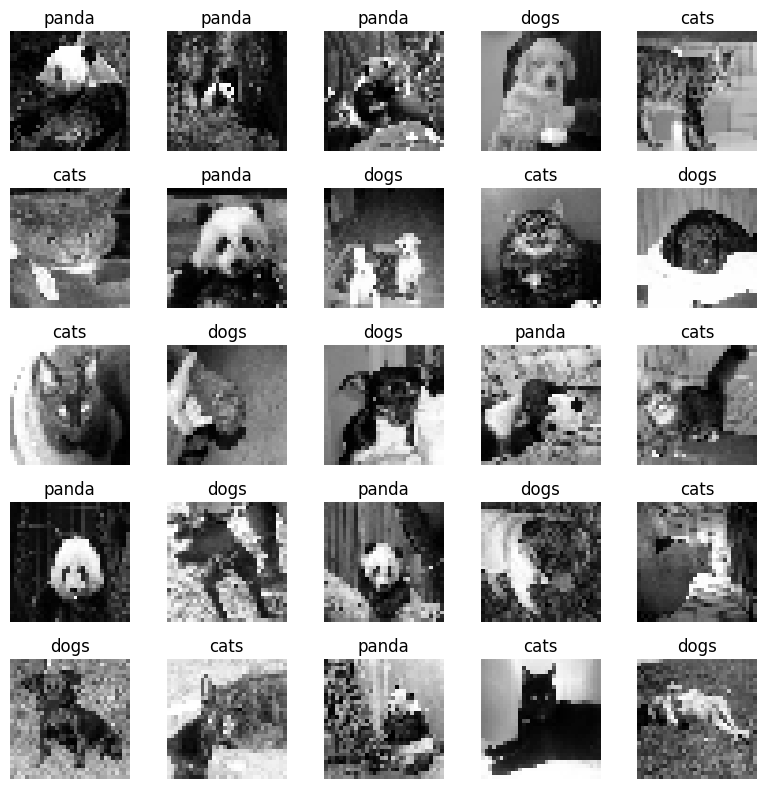

In [ ]:
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(data[i][0], cmap='gray')
    plt.title(data[i][1])
    plt.axis('off')
plt.tight_layout()
plt.show()

## 📐 Step 7: Define Distance Metrics (L1 & L2)

In [ ]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

## 🧠 Step 8: Implement k-NN Algorithm

In [ ]:
def k_nearest_neighbors(train_imgs, train_lbls, test_img, k, dist_fn):
    dists = [(dist_fn(train_img, test_img), label) for train_img, label in zip(train_imgs, train_lbls)]
    dists.sort(key=lambda x: x[0])
    k_labels = [label for _, label in dists[:k]]
    return Counter(k_labels).most_common(1)[0][0]


## 🔁 Step 9: Cross-Validation Function (5-Fold)

In [ ]:
def cross_validate(data, k_values, dist_fn):
    results = {k: [] for k in k_values}
    data = np.array(data, dtype=object)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    for k in k_values:
        for train_idx, test_idx in kf.split(data):
            train = data[train_idx]
            test = data[test_idx]
            train_imgs, train_lbls = zip(*train)
            test_imgs, test_lbls = zip(*test)

            correct = 0
            for img, lbl in zip(test_imgs, test_lbls):
                pred = k_nearest_neighbors(train_imgs, train_lbls, img, k, dist_fn)
                if pred == lbl:
                    correct += 1
            acc = correct / len(test_lbls)
            results[k].append(acc)

    return {k: np.mean(v) for k, v in results.items()}


## 🧪 Step 10: Define k Range and Evaluate

In [ ]:
k_values = list(range(1, 16))

euclidean_acc = cross_validate(data, k_values, euclidean_distance)
manhattan_acc = cross_validate(data, k_values, manhattan_distance)

## 📊 Step 11: Plot Accuracy vs. K

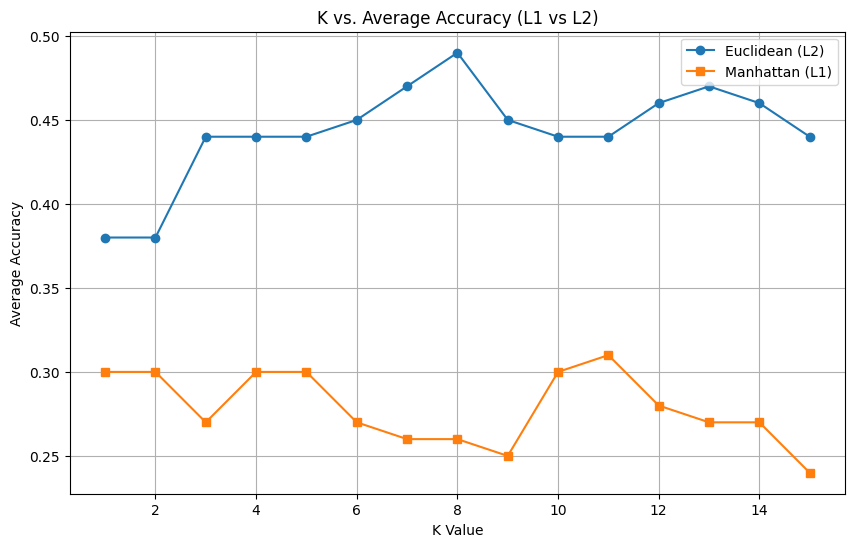

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, [euclidean_acc[k] for k in k_values], marker='o', label='Euclidean (L2)')
plt.plot(k_values, [manhattan_acc[k] for k in k_values], marker='s', label='Manhattan (L1)')
plt.xlabel('K Value')
plt.ylabel('Average Accuracy')
plt.title('K vs. Average Accuracy (L1 vs L2)')
plt.legend()
plt.grid(True)
plt.show()


## 🏆 Step 12: Output Best Performing k

In [ ]:
best_l1 = max(manhattan_acc, key=manhattan_acc.get)
best_l2 = max(euclidean_acc, key=euclidean_acc.get)

print(f"Best K for Manhattan (L1): {best_l1} with accuracy {manhattan_acc[best_l1]:.2f}")
print(f"Best K for Euclidean (L2): {best_l2} with accuracy {euclidean_acc[best_l2]:.2f}")


Best K for Manhattan (L1): 11 with accuracy 0.31
Best K for Euclidean (L2): 8 with accuracy 0.49


## 🎯 Step 13: Predict Top 5 Test Samples Using Best L2

In [ ]:
data_np = np.array(data, dtype=object)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, test_idx in kf.split(data_np):
    train_data = data_np[train_idx]
    test_data = data_np[test_idx]
    break  # Use only the first fold

train_imgs, train_lbls = zip(*train_data)
test_imgs, test_lbls = zip(*test_data)

top_preds = []
correct_preds = 0

for i in range(5):
    pred = k_nearest_neighbors(train_imgs, train_lbls, test_imgs[i], best_l2, euclidean_distance)
    is_correct = pred == test_lbls[i]
    if is_correct:
        correct_preds += 1
    top_preds.append((test_lbls[i], pred, test_imgs[i], is_correct))

accuracy = (correct_preds / 5) * 100
print(f"Top 5 Prediction Accuracy: {accuracy:.2f}%")


Top 5 Prediction Accuracy: 80.00%


## 🖼️ Step 14: Visualize the Top 5 Predictions

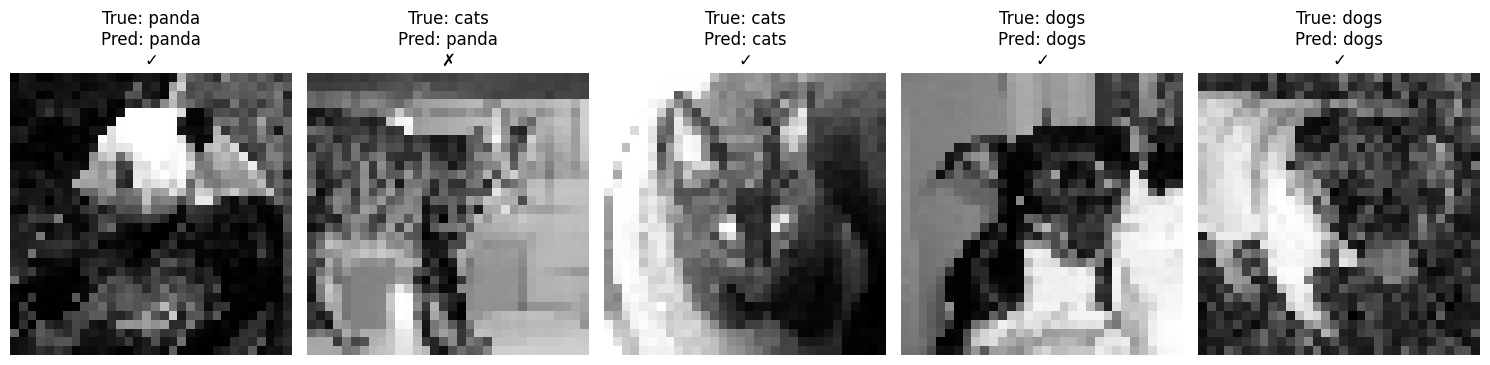

In [ ]:
plt.figure(figsize=(15, 5))
for i, (true_label, pred_label, img, is_correct) in enumerate(top_preds):
    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'True: {true_label}\nPred: {pred_label}\n{"✓" if is_correct else "✗"}')
    plt.axis('off')
plt.tight_layout()
plt.show()


# 📄 Documentation

---

## 📁 Dataset and Preprocessing

The dataset used in this project is sourced from Kaggle:
🔗 [Animal Image Dataset (Dog, Cat, Panda)](https://www.kaggle.com/datasets/ashishsaxena2209/animal-image-datasetdog-cat-and-panda)

It consists of labeled images of three animal categories — dogs, cats, and pandas. After downloading the dataset and placing it in a designated directory, the code begins by iterating through the dataset folders and collecting all image file paths, along with their associated labels (i.e., the folder names). This builds a complete list of `(image_path, label)` pairs.

To reduce computational complexity and ensure consistent input size, each image is:

* Read using OpenCV.
* Converted to **grayscale**, which simplifies the data by reducing the 3 RGB channels into one.
* Resized to a fixed resolution of **32×32 pixels**.

Finally, the image-label pairs are stored in a list named `data`. Only **100 randomly shuffled images** are used for demonstration purposes, as specified for quick experimentation.

---

## 🧠 Model Building and Evaluation

The classification task is handled using the **k-nearest neighbors (k-NN)** algorithm. This is a non-parametric, instance-based learning algorithm that classifies a new data point based on the majority class among its `k` nearest data points in the training set.

Two distance metrics are used for similarity comparison between images:

* **Euclidean Distance (L2 norm)**: Measures straight-line distance.
* **Manhattan Distance (L1 norm)**: Measures distance in a grid-like path (sum of absolute differences).

The core of the model is defined by the `k_nearest_neighbors()` function. It:

* Computes the distance between the test image and each training image using the specified metric.
* Sorts the distances and selects the top `k` labels.
* Predicts the most frequent label among these neighbors.

For evaluation, **5-fold cross-validation** is implemented. This means:

* The dataset is split into 5 parts.
* Each part takes a turn as the test set, while the remaining 4 are used for training.
* This process is repeated 5 times for each value of `k`, and the average accuracy is computed.

This strategy ensures a robust evaluation and avoids overfitting to a single test set.

---

## 📊 Results and Analysis

The code tests values of **k ranging from 1 to 15**. For each `k`, it performs 5-fold cross-validation using both distance metrics. The average accuracy from each configuration is stored in dictionaries: `euclidean_acc` and `manhattan_acc`.

To visualize the results:

* A **line plot** is created showing `k` values on the x-axis and average accuracy on the y-axis.
* Two lines represent Euclidean (L2) and Manhattan (L1) accuracies.

This plot helps to clearly compare the impact of different `k` values and distance metrics on model performance.

The code also determines and prints the best `k` value for each metric based on which value gave the highest average accuracy across folds.

---

## 💬 Discussion

From the graph and printed results, we can observe how the accuracy changes with varying values of `k`. Typically:

* **Smaller values of `k`** are more sensitive to noise but capture finer patterns.
* **Larger values of `k`** offer more generalization but may oversmooth class boundaries.

Between Manhattan (L1) and Euclidean (L2):

* The better-performing distance metric can depend on the **distribution of pixel intensities**, **data geometry**, and **image content**.
* In practice, **Euclidean distance** often performs slightly better for image classification because it accounts for spatial variance in pixel intensities more naturally.

However, this is not guaranteed and must be confirmed empirically as done in the plot.

**Limitations** of this model:

* No feature extraction — using raw pixels directly, which can be noisy.
* The model does not learn any internal representation (unlike neural networks).
* Limited number of images (only 100) may not reflect true performance.

---

## 🔍 Top 5 Predictions

To showcase the model’s real-world inference capabilities, the code:

* Takes the first fold from the KFold split.
* Classifies the first 5 test images using the best `k` value found for Euclidean distance.
* Compares the predicted label with the actual label.

The images are displayed in a single row with:

* The grayscale test image.
* The predicted and actual labels.
* A ✓ (tick) if the prediction is correct, or ✗ (cross) if incorrect.

This visual assessment helps determine whether the model can correctly identify unseen images. The final accuracy of these 5 samples is also printed to give a snapshot of real-time model performance.